In [117]:
# importing libnaries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.tseries.offsets as pd_offsets

Strategy will be quite simple and can be divided into three main steps.

1. Calculate the previous day returns (t-1), (t-2) & so on..
2. Feed the data into a model to predict the price movement.
3. Buy and hold as long as the preidctions hold true.

### Logistic Regression
We will work with Logistic Regression to feed our data.

Before we go further we should answer a feq questions.

What is $regression$?

Regression is a statsitical method used to find the relationship between a dependent and one or more independent variable. It is often done to make predictions or understand the strength & direction of the relationship. Further it is asupervised learning technique.

Here we will use time series analysis with our previosu day's data to predict the price movement. 

So what are dependent and independent variables?

*Indepedent variables: lagged returns, (t-1), (t-2,...)*

*Dependent variables: Up =1, Down=0*

If the probablistic model is above 0.5 we will label it as 1 price UP and if its below 0.5 we will label it price DOWN. 

In [118]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression

In [119]:
# Fetching the data for S^p500 index
df = yf.download('^GSPC', start = '2015-01-01', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [120]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2015-01-02,2058.199951,2058.199951,2072.360107,2046.040039,2058.899902,2708700000
2015-01-05,2020.579956,2020.579956,2054.439941,2017.339966,2054.439941,3799120000
2015-01-06,2002.609985,2002.609985,2030.250000,1992.439941,2022.150024,4460110000
2015-01-07,2025.900024,2025.900024,2029.609985,2005.550049,2005.550049,3805480000
2015-01-08,2062.139893,2062.139893,2064.080078,2030.609985,2030.609985,3934010000
...,...,...,...,...,...,...
2025-04-07,5062.250000,5062.250000,5246.569824,4835.040039,4953.790039,8691980000
2025-04-08,4982.770020,4982.770020,5267.470215,4910.419922,5193.569824,7408140000


In [121]:
# Creating a return column
df['return_'] = df['Close'].pct_change()

Creating a function to calculate the lag returns

In [122]:
# Cretaing a lagged return column
def lagit(df, lags):
    for i in range(1, lags + 1):
        df['lag_returns' + str(i)] = df['return_'].shift(i)
    return ['lag_returns' + str(i) for i in range(1, lags+1)]


In [123]:
lagit(df, 5)

['lag_returns1',
 'lag_returns2',
 'lag_returns3',
 'lag_returns4',
 'lag_returns5']

In [124]:
df

Price,Adj Close,Close,High,Low,Open,Volume,return_,lag_returns1,lag_returns2,lag_returns3,lag_returns4,lag_returns5
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,,,
Date,,,,,,,,,,,,
2015-01-02,2058.199951,2058.199951,2072.360107,2046.040039,2058.899902,2708700000,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,2020.579956,2020.579956,2054.439941,2017.339966,2054.439941,3799120000,-0.018278,NaN,NaN,NaN,NaN,NaN
2015-01-06,2002.609985,2002.609985,2030.250000,1992.439941,2022.150024,4460110000,-0.008893,-0.018278,NaN,NaN,NaN,NaN
2015-01-07,2025.900024,2025.900024,2029.609985,2005.550049,2005.550049,3805480000,0.011630,-0.008893,-0.018278,NaN,NaN,NaN
2015-01-08,2062.139893,2062.139893,2064.080078,2030.609985,2030.609985,3934010000,0.017888,0.011630,-0.008893,-0.018278,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-07,5062.250000,5062.250000,5246.569824,4835.040039,4953.790039,8691980000,-0.002331,-0.059750,-0.048396,0.006728,0.003781,0.005539
2025-04-08,4982.770020,4982.770020,5267.470215,4910.419922,5193.569824,7408140000,-0.015701,-0.002331,-0.059750,-0.048396,0.006728,0.003781


In [125]:
# Creating another column direction when the market is up or down
df['direction'] = np.where(df.return_ >0, 1, 0)


In [126]:
df
# Recap: when market went up we assigned 1 and when it went down we assigned 0

Price,Adj Close,Close,High,Low,Open,Volume,return_,lag_returns1,lag_returns2,lag_returns3,lag_returns4,lag_returns5,direction
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,,,,
Date,,,,,,,,,,,,,
2015-01-02,2058.199951,2058.199951,2072.360107,2046.040039,2058.899902,2708700000,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-01-05,2020.579956,2020.579956,2054.439941,2017.339966,2054.439941,3799120000,-0.018278,NaN,NaN,NaN,NaN,NaN,0
2015-01-06,2002.609985,2002.609985,2030.250000,1992.439941,2022.150024,4460110000,-0.008893,-0.018278,NaN,NaN,NaN,NaN,0
2015-01-07,2025.900024,2025.900024,2029.609985,2005.550049,2005.550049,3805480000,0.011630,-0.008893,-0.018278,NaN,NaN,NaN,1
2015-01-08,2062.139893,2062.139893,2064.080078,2030.609985,2030.609985,3934010000,0.017888,0.011630,-0.008893,-0.018278,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-07,5062.250000,5062.250000,5246.569824,4835.040039,4953.790039,8691980000,-0.002331,-0.059750,-0.048396,0.006728,0.003781,0.005539,0
2025-04-08,4982.770020,4982.770020,5267.470215,4910.419922,5193.569824,7408140000,-0.015701,-0.002331,-0.059750,-0.048396,0.006728,0.003781,0


In [127]:
df.direction.value_counts()

direction
1    1387
0    1198
Name: count, dtype: int64

As we can see market went up 1387 and market went down 1198 times. We should be aware of the imabalance to the data since Regression is very sensitive to imbalances.

In [128]:
features = lagit(df,5)
features

['lag_returns1',
 'lag_returns2',
 'lag_returns3',
 'lag_returns4',
 'lag_returns5']

In [129]:
# Dropping the missing values
df.dropna(inplace=True)

### Building the model

In [130]:
# Independent variable
X = df[features]
# dependent variables
y = df['direction']

# Model
model = LogisticRegression(class_weight = 'balanced')
model.fit(X,y)

LogisticRegression(class_weight='balanced')

Now that the model setup is ready. We can start to make predictions.

In [131]:
# Predicting the values
model.predict(X)
# Getting the probabilities

array([1, 0, 0, ..., 1, 0, 1])

In [132]:
df['prediction_LR'] = model.predict(X)

In [133]:
df

Price,Adj Close,Close,High,Low,Open,Volume,return_,lag_returns1,lag_returns2,lag_returns3,lag_returns4,lag_returns5,direction,prediction_LR
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,,,,,
Date,,,,,,,,,,,,,,
2015-01-12,2028.260010,2028.260010,2049.300049,2022.579956,2046.130005,3456460000,-0.008094,-0.008404,0.017888,0.011630,-0.008893,-0.018278,0,1
2015-01-13,2023.030029,2023.030029,2056.929932,2008.250000,2031.579956,4107300000,-0.002579,-0.008094,-0.008404,0.017888,0.011630,-0.008893,0,0
2015-01-14,2011.270020,2011.270020,2018.400024,1988.439941,2018.400024,4378680000,-0.005813,-0.002579,-0.008094,-0.008404,0.017888,0.011630,0,0
2015-01-15,1992.670044,1992.670044,2021.349976,1991.469971,2013.750000,4276720000,-0.009248,-0.005813,-0.002579,-0.008094,-0.008404,0.017888,0,1
2015-01-16,2019.420044,2019.420044,2020.459961,1988.119995,1992.250000,4056410000,0.013424,-0.009248,-0.005813,-0.002579,-0.008094,-0.008404,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-07,5062.250000,5062.250000,5246.569824,4835.040039,4953.790039,8691980000,-0.002331,-0.059750,-0.048396,0.006728,0.003781,0.005539,0,1
2025-04-08,4982.770020,4982.770020,5267.470215,4910.419922,5193.569824,7408140000,-0.015701,-0.002331,-0.059750,-0.048396,0.006728,0.003781,0,0


Calculate the return from the strategy using the model.

In [134]:
df['strategy'] = df['prediction_LR'] * df.return_
df

Price,Adj Close,Close,High,Low,Open,Volume,return_,lag_returns1,lag_returns2,lag_returns3,lag_returns4,lag_returns5,direction,prediction_LR,strategy
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,,,,,,
Date,,,,,,,,,,,,,,,
2015-01-12,2028.260010,2028.260010,2049.300049,2022.579956,2046.130005,3456460000,-0.008094,-0.008404,0.017888,0.011630,-0.008893,-0.018278,0,1,-0.008094
2015-01-13,2023.030029,2023.030029,2056.929932,2008.250000,2031.579956,4107300000,-0.002579,-0.008094,-0.008404,0.017888,0.011630,-0.008893,0,0,-0.000000
2015-01-14,2011.270020,2011.270020,2018.400024,1988.439941,2018.400024,4378680000,-0.005813,-0.002579,-0.008094,-0.008404,0.017888,0.011630,0,0,-0.000000
2015-01-15,1992.670044,1992.670044,2021.349976,1991.469971,2013.750000,4276720000,-0.009248,-0.005813,-0.002579,-0.008094,-0.008404,0.017888,0,1,-0.009248
2015-01-16,2019.420044,2019.420044,2020.459961,1988.119995,1992.250000,4056410000,0.013424,-0.009248,-0.005813,-0.002579,-0.008094,-0.008404,1,1,0.013424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-07,5062.250000,5062.250000,5246.569824,4835.040039,4953.790039,8691980000,-0.002331,-0.059750,-0.048396,0.006728,0.003781,0.005539,0,1,-0.002331
2025-04-08,4982.770020,4982.770020,5267.470215,4910.419922,5193.569824,7408140000,-0.015701,-0.002331,-0.059750,-0.048396,0.006728,0.003781,0,0,-0.000000


In [135]:
# Accumlating the returns from the strategy
# returns gains from S&P
# startegy gains from model
(df[['strategy', 'return_']] + 1).cumprod() -1

Price,strategy,return_
Ticker,,
Date,,
2015-01-12,-0.008094,-0.008094
2015-01-13,-0.008094,-0.010651
2015-01-14,-0.008094,-0.016403
2015-01-15,-0.017267,-0.025499
2015-01-16,-0.004074,-0.012417
...,...,...
2025-04-07,1.722864,1.475658
2025-04-08,1.722864,1.436789


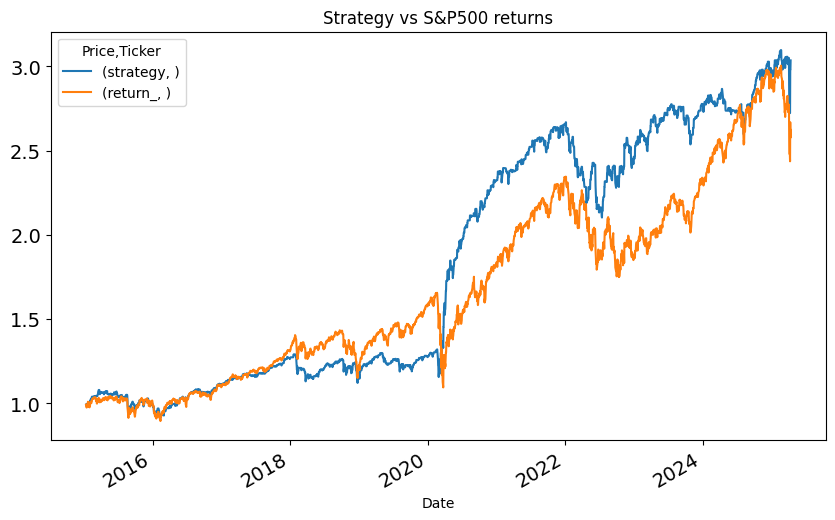

In [136]:
(df[['strategy', 'return_']] + 1).cumprod().plot( figsize=(10, 6), title='Strategy vs S&P500 returns',fontsize=14)
plt.show()

We can see that strategy did outperform returns from S&P 500 after 2020. However, this is an exampel of Overfitting. We tried to fit the model on all the data we have and we cannot test that this model will hold true.

Next, we are going to split the data into 3 sets train, test & validate.

We will try to get a balanced view of the model. We will perform the model on training data and then test it on our test data and finally, validate or conclude if the strategy gives btter return than S&P500.

This will ensure there is no biased and we are able to maintain the accuracy of the model.

In [137]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

In [138]:
X_train

Price,lag_returns1,lag_returns2,lag_returns3,lag_returns4,lag_returns5
Ticker,,,,,
Date,,,,,
2015-01-12,-0.008404,0.017888,0.011630,-0.008893,-0.018278
2015-01-13,-0.008094,-0.008404,0.017888,0.011630,-0.008893
2015-01-14,-0.002579,-0.008094,-0.008404,0.017888,0.011630
2015-01-15,-0.005813,-0.002579,-0.008094,-0.008404,0.017888
2015-01-16,-0.009248,-0.005813,-0.002579,-0.008094,-0.008404
...,...,...,...,...,...
2022-03-07,-0.007934,-0.005255,0.018643,-0.015474,-0.002443
2022-03-08,-0.029518,-0.007934,-0.005255,0.018643,-0.015474


In [139]:
X_test

Price,lag_returns1,lag_returns2,lag_returns3,lag_returns4,lag_returns5
Ticker,,,,,
Date,,,,,
2022-03-14,-0.012962,-0.004292,0.025698,-0.007234,-0.029518
2022-03-15,-0.007421,-0.012962,-0.004292,0.025698,-0.007234
2022-03-16,0.021409,-0.007421,-0.012962,-0.004292,0.025698
2022-03-17,0.022384,0.021409,-0.007421,-0.012962,-0.004292
2022-03-18,0.012348,0.022384,0.021409,-0.007421,-0.012962
...,...,...,...,...,...
2025-04-07,-0.059750,-0.048396,0.006728,0.003781,0.005539
2025-04-08,-0.002331,-0.059750,-0.048396,0.006728,0.003781


In [140]:
# We will try to fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
# Making prediction on the test data
X_test['prediction_LR'] = model.predict(X_test)
X_test

X_test data does not contain the return data from the original Dataframe so we will not be able to do comparison. We will filter the return data only for X_test data.

In [ ]:
# fetching the return data for x_test
X_test['return'] = df.return_[X_test.index[0]:]
# X_test

In [150]:
# Calcuklating the strategy returns
X_test['strategy'] = X_test['prediction_LR']* X_test['return']

# Cumulative returns
(X_test[['strategy', 'return']] + 1).cumprod() -1

Price,strategy,return
Ticker,,
Date,,
2022-03-14,-0.007421,-0.007421
2022-03-15,0.013829,0.013829
2022-03-16,0.013829,0.036522
2022-03-17,0.013829,0.049321
2022-03-18,0.013829,0.061558
...,...,...
2025-04-07,0.207686,0.204062
2025-04-08,0.188724,0.185158


Now we can plot the returns for the comparison.

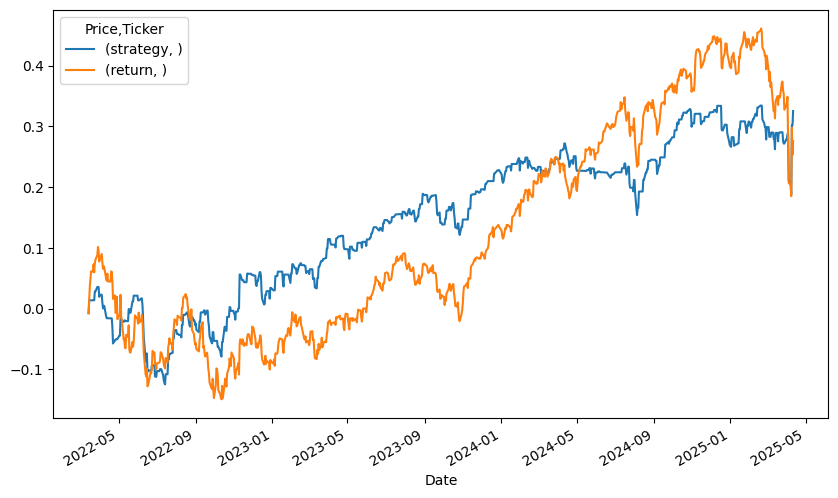

In [152]:
((X_test[['strategy', 'return']] + 1).cumprod() -1).plot(figsize=(10,6))
plt.show()

We see that the strategy gave better returns after 2022 till mid of 2024 and then S&P returns took over the strategy returns. We also see strategy and returns are coming together now in 2025.

Let's dive into the data a bit more. We will take last 52 days into consideration and then track the return.

<Axes: title={'center': 'Last 50 days returns'}, xlabel='Date'>

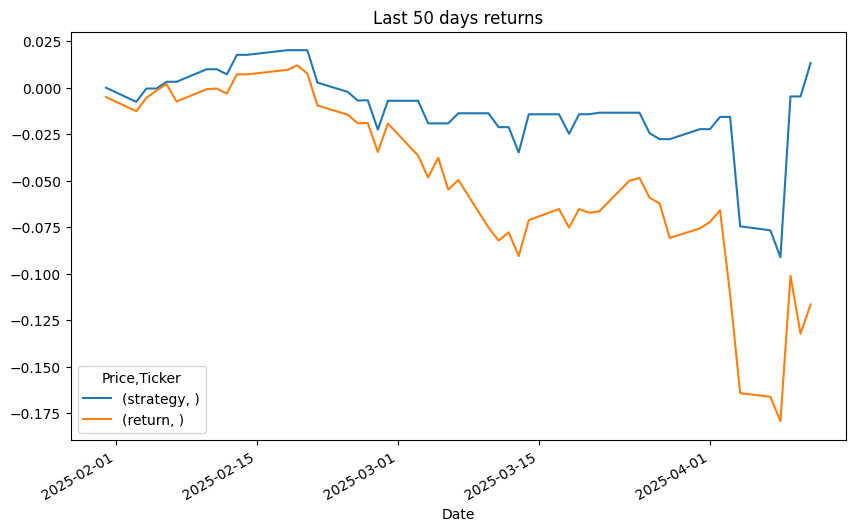

In [153]:
# returns for the past 50 days
((X_test.tail(50)[['strategy', 'return']] + 1).cumprod() -1).plot(figsize=(10,6), title='Last 50 days returns')

In [154]:
X_test

Price,lag_returns1,lag_returns2,lag_returns3,lag_returns4,lag_returns5,prediction_LR,return,strategy
Ticker,,,,,,,,
Date,,,,,,,,
2022-03-14,-0.012962,-0.004292,0.025698,-0.007234,-0.029518,1,-0.007421,-0.007421
2022-03-15,-0.007421,-0.012962,-0.004292,0.025698,-0.007234,1,0.021409,0.021409
2022-03-16,0.021409,-0.007421,-0.012962,-0.004292,0.025698,0,0.022384,0.000000
2022-03-17,0.022384,0.021409,-0.007421,-0.012962,-0.004292,0,0.012348,0.000000
2022-03-18,0.012348,0.022384,0.021409,-0.007421,-0.012962,0,0.011662,0.000000
...,...,...,...,...,...,...,...,...
2025-04-07,-0.059750,-0.048396,0.006728,0.003781,0.005539,1,-0.002331,-0.002331
2025-04-08,-0.002331,-0.059750,-0.048396,0.006728,0.003781,1,-0.015701,-0.015701


* We can see even in the past 50 days the stratgey has given more returns the S&P 500, considering global issues.

* Also as a reminder the strategy was to stay out of the market when the 'prediction_LR' columns gives signal as 0. 

* Another thing to take in the consideration is whenever prediction_LR changes the transaction cost comes into effect. 